# air
## inport and read

In [1]:
import dask
import re
import dask
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

### air_reserve

In [41]:
df_air_reserve=pd.read_csv('~/Desktop/ml/restaurant_vistor/air_reserve.csv')
df_air_reserve.head(10)

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5
5,air_db80363d35f10926,2016-01-02 01:00:00,2016-01-01 16:00:00,2
6,air_db80363d35f10926,2016-01-02 01:00:00,2016-01-01 15:00:00,4
7,air_3bb99a1fe0583897,2016-01-02 16:00:00,2016-01-02 14:00:00,2
8,air_3bb99a1fe0583897,2016-01-02 16:00:00,2016-01-01 20:00:00,2
9,air_2b8b29ddfd35018e,2016-01-02 17:00:00,2016-01-02 17:00:00,2


In [126]:
df_air_reserve.isnull().values.any()

False

In [42]:
df_air_reserve.shape

(92378, 4)

##### 92378 reservations
##### air_store_id not unique
##### no null values

In [55]:
df_air_reserve['visit_date']=df_air_reserve['visit_datetime'].str.split().str[0]
df_air_reserve['visit_time']=df_air_reserve['visit_datetime'].str.split().str[1]
df_air_reserve['reserve_date']=df_air_reserve['reserve_datetime'].str.split().str[0]
df_air_reserve['reserve_time']=df_air_reserve['reserve_datetime'].str.split().str[1]
df_air_reserve.head(10)

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors,visit_date,visit_time,reserve_date,reserve_time
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1,2016-01-01,19:00:00,2016-01-01,16:00:00
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3,2016-01-01,19:00:00,2016-01-01,19:00:00
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6,2016-01-01,19:00:00,2016-01-01,19:00:00
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2,2016-01-01,20:00:00,2016-01-01,16:00:00
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5,2016-01-01,20:00:00,2016-01-01,01:00:00
5,air_db80363d35f10926,2016-01-02 01:00:00,2016-01-01 16:00:00,2,2016-01-02,01:00:00,2016-01-01,16:00:00
6,air_db80363d35f10926,2016-01-02 01:00:00,2016-01-01 15:00:00,4,2016-01-02,01:00:00,2016-01-01,15:00:00
7,air_3bb99a1fe0583897,2016-01-02 16:00:00,2016-01-02 14:00:00,2,2016-01-02,16:00:00,2016-01-02,14:00:00
8,air_3bb99a1fe0583897,2016-01-02 16:00:00,2016-01-01 20:00:00,2,2016-01-02,16:00:00,2016-01-01,20:00:00
9,air_2b8b29ddfd35018e,2016-01-02 17:00:00,2016-01-02 17:00:00,2,2016-01-02,17:00:00,2016-01-02,17:00:00


In [73]:
# group by store_id & visit_date
df_air_reserve_grouped=df_air_reserve.groupby(['air_store_id','visit_date']).sum()
df_air_reserve_grouped=df_air_reserve_grouped.reset_index()
df_air_reserve_grouped.head(10)

,air_store_id,visit_date,reserve_visitors
0,air_00a91d42b08b08d9,2016-10-31,2
1,air_00a91d42b08b08d9,2016-12-05,9
2,air_00a91d42b08b08d9,2016-12-14,18
3,air_00a91d42b08b08d9,2016-12-17,2
4,air_00a91d42b08b08d9,2016-12-20,4
5,air_00a91d42b08b08d9,2017-02-18,9
6,air_00a91d42b08b08d9,2017-02-23,12
7,air_00a91d42b08b08d9,2017-03-01,3
8,air_00a91d42b08b08d9,2017-03-14,4
9,air_00a91d42b08b08d9,2017-03-21,3


##### store_id + visit_date is unique

### air_store_info

In [5]:
df_air_store_info=pd.read_csv('~/Desktop/ml/restaurant_vistor/air_store_info.csv')
df_air_store_info.head(10)

,air_store_id,air_genre_name,air_area_name,latitude,longitude
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
5,air_99c3eae84130c1cb,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
6,air_f183a514cb8ff4fa,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
7,air_6b9fa44a9cf504a1,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
8,air_0919d54f0c9a24b8,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
9,air_2c6c79d597e48096,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599


In [127]:
df_air_store_info.isnull().values.any()

False

In [34]:
df_air_store_info.shape

(829, 5)

##### 829 restaurants
##### air_store_id is unique
##### no null values

### air_visit_data

In [67]:
df_air_visit_data=pd.read_csv('~/Desktop/ml/restaurant_vistor/air_visit_data.csv')
df_air_visit_data.head(10)

,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-13,25
1,air_ba937bf13d40fb24,2016-01-14,32
2,air_ba937bf13d40fb24,2016-01-15,29
3,air_ba937bf13d40fb24,2016-01-16,22
4,air_ba937bf13d40fb24,2016-01-18,6
5,air_ba937bf13d40fb24,2016-01-19,9
6,air_ba937bf13d40fb24,2016-01-20,31
7,air_ba937bf13d40fb24,2016-01-21,21
8,air_ba937bf13d40fb24,2016-01-22,18
9,air_ba937bf13d40fb24,2016-01-23,26


In [128]:
df_air_visit_data.isnull().values.any()

False

In [35]:
df_air_visit_data.shape

(252108, 3)

##### 252108 visits
##### air_store_id + visit_date is unique
##### no null values

### date_info

In [9]:
df_date_info=pd.read_csv('~/Desktop/ml/restaurant_vistor/date_info.csv')
df_date_info.head(10)

,calendar_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1
2,2016-01-03,Sunday,1
3,2016-01-04,Monday,0
4,2016-01-05,Tuesday,0
5,2016-01-06,Wednesday,0
6,2016-01-07,Thursday,0
7,2016-01-08,Friday,0
8,2016-01-09,Saturday,0
9,2016-01-10,Sunday,0


In [130]:
df_date_info.isnull().values.any()

False

In [125]:
df_date_info.shape

(517, 3)

### join all air tables

In [76]:
# join tables df_air_reserve_grouped, df_air_store_info & df_air_visit_data
df_air=df_air_reserve_grouped.merge(df_air_store_info, left_on='air_store_id', right_on='air_store_id', how='outer')
df_air=df_air.merge(df_air_visit_data, left_on=['air_store_id', 'visit_date'], right_on=['air_store_id', 'visit_date'], how='outer')

In [83]:
# join date_info
df_air=df_air.merge(df_date_info, left_on=['visit_date'], right_on=['calendar_date'], how='left')

In [84]:
df_air.head(10)

,air_store_id,visit_date,reserve_visitors,air_genre_name,air_area_name,latitude,longitude,visitors,calendar_date,day_of_week,holiday_flg
0,air_00a91d42b08b08d9,2016-10-31,2.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,26.0,2016-10-31,Monday,0.0
1,air_00a91d42b08b08d9,2016-12-05,9.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,33.0,2016-12-05,Monday,0.0
2,air_00a91d42b08b08d9,2016-12-14,18.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,30.0,2016-12-14,Wednesday,0.0
3,air_00a91d42b08b08d9,2016-12-17,2.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,17.0,2016-12-17,Saturday,0.0
4,air_00a91d42b08b08d9,2016-12-20,4.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,37.0,2016-12-20,Tuesday,0.0
5,air_00a91d42b08b08d9,2017-02-18,9.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,18.0,2017-02-18,Saturday,0.0
6,air_00a91d42b08b08d9,2017-02-23,12.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,40.0,2017-02-23,Thursday,0.0
7,air_00a91d42b08b08d9,2017-03-01,3.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,17.0,2017-03-01,Wednesday,0.0
8,air_00a91d42b08b08d9,2017-03-14,4.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,28.0,2017-03-14,Tuesday,0.0
9,air_00a91d42b08b08d9,2017-03-21,3.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,28.0,2017-03-21,Tuesday,0.0


# Meet data

In [81]:
df_air.shape

(254389, 8)

In [78]:
df_air.count()

air_store_id        254389
visit_date          253874
reserve_visitors     29830
air_genre_name       30345
air_area_name        30345
latitude             30345
longitude            30345
visitors            252108
dtype: int64

### Reserve & Visit

Text(0,0.5,'visit')

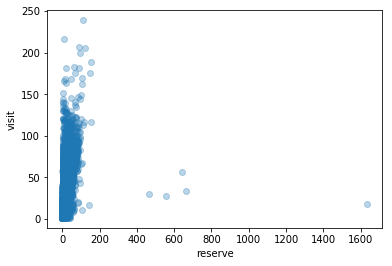

In [80]:
plt.scatter(df_air['reserve_visitors'], df_air['visitors'], alpha=.3)
plt.xlabel('reserve')
plt.ylabel('visit')

(0, 300)

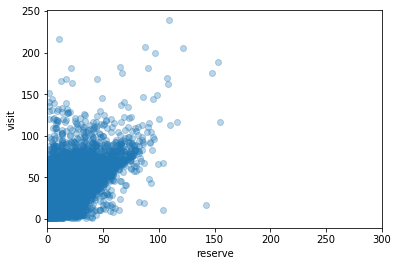

In [86]:
plt.scatter(df_air['reserve_visitors'], df_air['visitors'], alpha=.3)
plt.xlabel('reserve')
plt.ylabel('visit')
plt.xlim(0, 300)

Text(0,0.5,'visit')

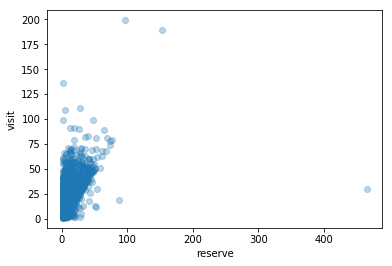

In [93]:
## by day of week

plt.scatter(df_air[df_air['day_of_week']=='Monday']['reserve_visitors'], df_air[df_air['day_of_week']=='Monday']['visitors'], alpha=.3)
plt.xlabel('reserve')
plt.ylabel('visit')

### By Store

Text(0,0.5,'visit')

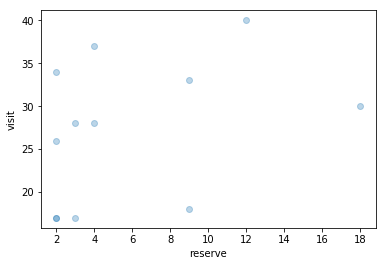

In [92]:
## by store
plt.scatter(df_air[df_air['air_store_id']=='air_00a91d42b08b08d9']['reserve_visitors'], df_air[df_air['air_store_id']=='air_00a91d42b08b08d9']['visitors'], alpha=.3)
plt.xlabel('reserve')
plt.ylabel('visit')

In [117]:
df_air_exp=df_air[df_air['air_store_id']=='air_00a91d42b08b08d9'].sort_values(by='visit_date')
df_air_exp.set_index('visit_date', inplace=True)
df_air_exp.head(10)

,air_store_id,reserve_visitors,air_genre_name,air_area_name,latitude,longitude,visitors,calendar_date,day_of_week,holiday_flg
visit_date,,,,,,,,,,
2016-07-01,air_00a91d42b08b08d9,NaN,NaN,NaN,NaN,NaN,35.0,2016-07-01,Friday,0.0
2016-07-02,air_00a91d42b08b08d9,NaN,NaN,NaN,NaN,NaN,9.0,2016-07-02,Saturday,0.0
2016-07-04,air_00a91d42b08b08d9,NaN,NaN,NaN,NaN,NaN,20.0,2016-07-04,Monday,0.0
2016-07-05,air_00a91d42b08b08d9,NaN,NaN,NaN,NaN,NaN,25.0,2016-07-05,Tuesday,0.0
2016-07-06,air_00a91d42b08b08d9,NaN,NaN,NaN,NaN,NaN,29.0,2016-07-06,Wednesday,0.0
2016-07-07,air_00a91d42b08b08d9,NaN,NaN,NaN,NaN,NaN,34.0,2016-07-07,Thursday,0.0
2016-07-08,air_00a91d42b08b08d9,NaN,NaN,NaN,NaN,NaN,42.0,2016-07-08,Friday,0.0
2016-07-09,air_00a91d42b08b08d9,NaN,NaN,NaN,NaN,NaN,11.0,2016-07-09,Saturday,0.0
2016-07-11,air_00a91d42b08b08d9,NaN,NaN,NaN,NaN,NaN,25.0,2016-07-11,Monday,0.0


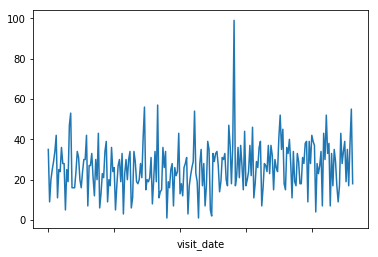

In [119]:
df_air_exp['visitors'].plot()

In [122]:
df_air_exp.sort_values(by='visitors',ascending=False).head(10)

,air_store_id,reserve_visitors,air_genre_name,air_area_name,latitude,longitude,visitors,calendar_date,day_of_week,holiday_flg
visit_date,,,,,,,,,,
2016-12-24,air_00a91d42b08b08d9,NaN,NaN,NaN,NaN,NaN,99.0,2016-12-24,Saturday,0.0
2016-10-14,air_00a91d42b08b08d9,NaN,NaN,NaN,NaN,NaN,57.0,2016-10-14,Friday,0.0
2016-10-01,air_00a91d42b08b08d9,NaN,NaN,NaN,NaN,NaN,56.0,2016-10-01,Saturday,0.0
2017-04-21,air_00a91d42b08b08d9,NaN,NaN,NaN,NaN,NaN,55.0,2017-04-21,Friday,0.0
2016-11-18,air_00a91d42b08b08d9,NaN,NaN,NaN,NaN,NaN,54.0,2016-11-18,Friday,0.0
2016-07-22,air_00a91d42b08b08d9,NaN,NaN,NaN,NaN,NaN,53.0,2016-07-22,Friday,0.0
2017-03-29,air_00a91d42b08b08d9,NaN,NaN,NaN,NaN,NaN,52.0,2017-03-29,Wednesday,0.0
2017-02-15,air_00a91d42b08b08d9,NaN,NaN,NaN,NaN,NaN,52.0,2017-02-15,Wednesday,0.0
2016-12-19,air_00a91d42b08b08d9,NaN,NaN,NaN,NaN,NaN,47.0,2016-12-19,Monday,0.0


In [124]:
df_air.groupby('holiday_flg').count()

,air_store_id,visit_date,reserve_visitors,air_genre_name,air_area_name,latitude,longitude,visitors,calendar_date,day_of_week
holiday_flg,,,,,,,,,,
0.0,240844,240844,28131,28131,28131,28131,28131,239333,240844,240844
1.0,13030,13030,1699,1699,1699,1699,1699,12775,13030,13030
